In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATDynamic, nets
from NEATModels.config import dynamic_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"


Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/VKepler/CurieTrainingDatasets/oneatnpz/'
npz_name = 'apoptosismodelbin2.npz'
npz_val_name = 'apoptosismodelbin2val.npz'

#Read and Write the h5 file, directory location and name
model_dir =  '/home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/'
model_name = 'apoptosisd29s3f8.h5'

In [3]:
#Neural network parameters
division_categories_json = model_dir + 'ApoptosisCategories.json'
key_categories = load_json(division_categories_json)
division_cord_json = model_dir + 'ApoptosisCord.json'
key_cord = load_json(division_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 8
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
lstm_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-3
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 8
# use softmax for single event per box, sigmoid for multi event per box
lstm_hidden_unit = 8
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
show = True
stage_number = 3
last_conv_factor = 4
size_tminus = 3
size_tplus = 3
imagex = 64
imagey = 64
yolo_v0 = False
yolo_v1 = True
yolo_v2 = False
multievent = False

In [4]:

config = dynamic_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name,
                         multievent = multievent,
                         key_categories = key_categories, key_cord = key_cord, nboxes = nboxes, imagex = imagex,
                         imagey = imagey, size_tminus = size_tminus, size_tplus =size_tplus, epochs = epochs, yolo_v0 = yolo_v0, yolo_v1 = yolo_v1, yolo_v2 = yolo_v2,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel, stage_number = stage_number, last_conv_factor = last_conv_factor,
                         lstm_kernel = lstm_kernel, lstm_hidden_unit = lstm_hidden_unit, show = show,
                         startfilter = startfilter, batch_size = batch_size, model_name = model_name)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

dynamic_config(batch_size=4, box_vector=6, categories=6, depth=29, epochs=250, imagex=64, imagey=64, key_categories={'Normal': 0, 'Division': 1, 'Apoptosis': 2, 'MacroCheate': 3, 'NonMatureP1': 4, 'MatureP1': 5}, key_cord={'x': 0, 'y': 1, 't': 2, 'h': 3, 'w': 4, 'c': 5}, last_conv_factor=4, learning_rate=0.0001, lstm_hidden_unit=8, lstm_kernel=3, mid_kernel=3, model_name='apoptosisd29s3f32.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/VKepler/CurieTrainingDatasets/oneatnpz/', npz_name='apoptosismodelbin2.npz', npz_val_name='apoptosismodelbin2val.npz', residual=True, show=True, size_tminus=3, size_tplus=3, stage_number=3, start_kernel=7, startfilter=32, stride=4, yolo_v0=False, yolo_v1=True, yolo_v2=False)


number of  images:	 14184
image size (3D):		 (7, 64, 64)
axes:				 STXYC
channels in / out:		 1
number of  images:	 747
image size (3D):		 (7, 64, 64)
axes:				 STXYC
channels in / out:		 1
(14184, 1, 1, 12) 1


/home/sancere/anaconda3/envs/tensorflowGPU/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2 3 4], y=[2 1 1 ... 1 1 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
2021-09-05 19:13:47.469166: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-09-05 19:13:47.520196: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:17:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2021-09-05 19:13:47.520434: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-09-05 19:13:47.521978: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully open

notbinary
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 7, None, None 0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 7, None, None 1600        input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 7, None, None 11008       input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 7, None, None 128         time_distributed_1[0][0]         
__________________________________________________________________________________

Train on 14184 samples, validate on 747 samples
Epoch 1/250


2021-09-05 19:14:32.357029: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-09-05 19:14:34.097446: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


14184/14184 [==============================] - 978s 69ms/step - loss: 3.4719 - accuracy: 0.1810 - val_loss: 3.3374 - val_accuracy: 0.3226

Epoch 00001: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f32.h5


<Figure size 432x288 with 0 Axes>

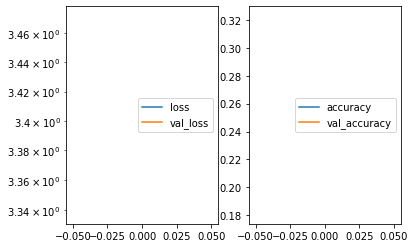

Predicted cell: Division Probability: [[0.9965006]]
True Cell type: Division
x [[0.5176172]]
True positional value x 0.5
y [[0.5471398]]
True positional value y 0.5
t [[0.48838776]]
True positional value t 0.5
h [[0.51711875]]
True positional value h 0.5
w [[0.52091545]]
True positional value w 0.5
c [[0.97354984]]
True positional value c 1.0


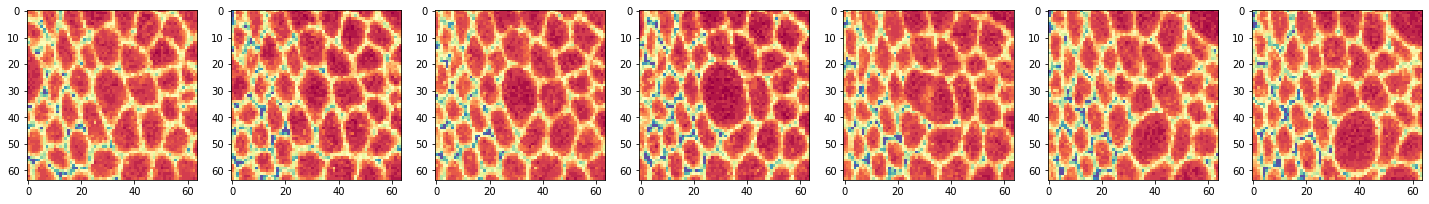

Epoch 2/250
14184/14184 [==============================] - 955s 67ms/step - loss: 3.1415 - accuracy: 0.2989 - val_loss: 3.1386 - val_accuracy: 0.3333

Epoch 00002: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f32.h5


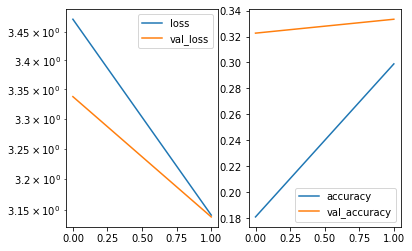

Predicted cell: Normal Probability: [[0.5446692]]
True Cell type: Apoptosis
x [[0.48615453]]
True positional value x 0.5
y [[0.49940634]]
True positional value y 0.5
t [[0.49516755]]
True positional value t 0.5
h [[0.4947374]]
True positional value h 0.5
w [[0.48702285]]
True positional value w 0.5
c [[0.90795624]]
True positional value c 1.0


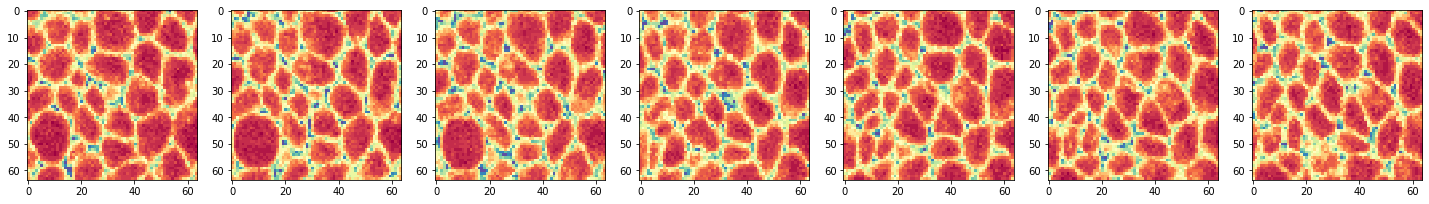

Epoch 3/250
14184/14184 [==============================] - 972s 69ms/step - loss: 3.4188 - accuracy: 0.1589 - val_loss: 3.3979 - val_accuracy: 0.0857

Epoch 00003: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f32.h5


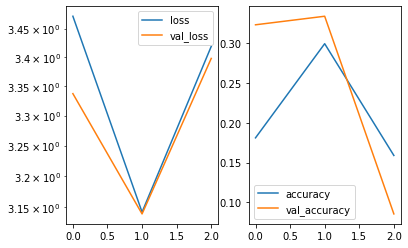

Predicted cell: Division Probability: [[0.8667305]]
True Cell type: Division
x [[0.47674763]]
True positional value x 0.5
y [[0.505968]]
True positional value y 0.5
t [[0.5033931]]
True positional value t 0.5
h [[0.5113256]]
True positional value h 0.5
w [[0.5233488]]
True positional value w 0.5
c [[0.9483708]]
True positional value c 1.0


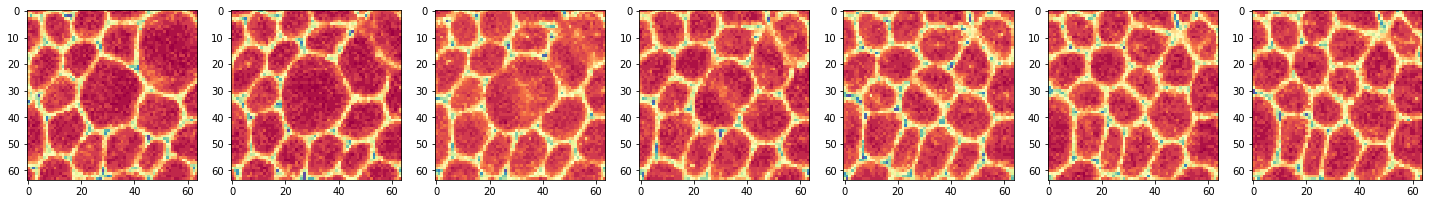

Epoch 4/250
14184/14184 [==============================] - 970s 68ms/step - loss: 3.4587 - accuracy: 0.0909 - val_loss: 3.6341 - val_accuracy: 0.0013

Epoch 00004: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f32.h5


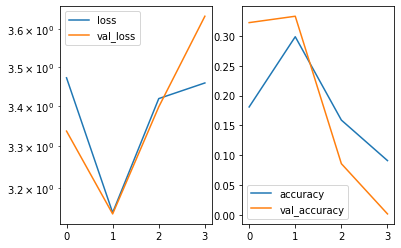

Predicted cell: Division Probability: [[0.6991505]]
True Cell type: Normal
x [[0.52539194]]
True positional value x 0.5
y [[0.5146227]]
True positional value y 0.5
t [[0.5347468]]
True positional value t 0.5
h [[0.48291722]]
True positional value h 0.5
w [[0.48520386]]
True positional value w 0.5
c [[0.96680015]]
True positional value c 1.0


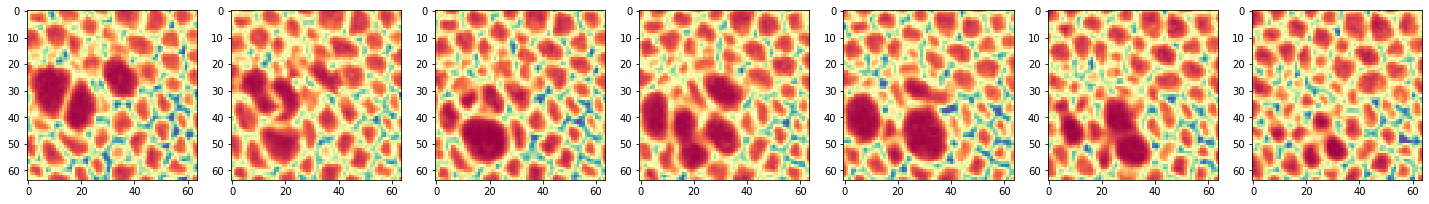

Epoch 5/250
14184/14184 [==============================] - 971s 68ms/step - loss: 3.8020 - accuracy: 0.0140 - val_loss: 3.7834 - val_accuracy: 0.0000e+00

Epoch 00005: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f32.h5


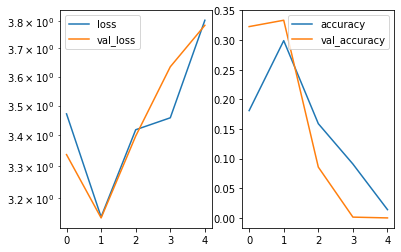

Predicted cell: Normal Probability: [[0.4849252]]
True Cell type: Division
x [[0.49284655]]
True positional value x 0.5
y [[0.5010133]]
True positional value y 0.5
t [[0.49319828]]
True positional value t 0.5
h [[0.504615]]
True positional value h 0.5
w [[0.49649906]]
True positional value w 0.5
c [[0.9999882]]
True positional value c 1.0


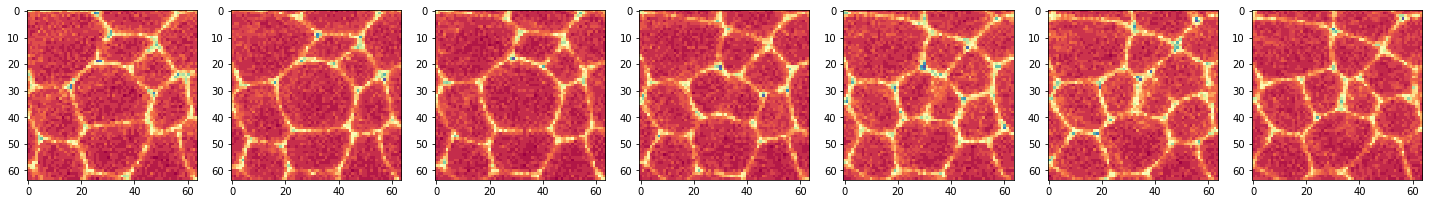

Epoch 6/250
14184/14184 [==============================] - 960s 68ms/step - loss: 3.8412 - accuracy: 0.0000e+00 - val_loss: 3.7376 - val_accuracy: 0.0000e+00

Epoch 00006: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 00006: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f32.h5


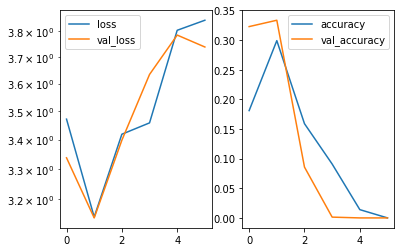

Predicted cell: Division Probability: [[0.5927418]]
True Cell type: Division
x [[0.5061155]]
True positional value x 0.5
y [[0.5020953]]
True positional value y 0.5
t [[0.50239486]]
True positional value t 0.5
h [[0.5059]]
True positional value h 0.5
w [[0.5013416]]
True positional value w 0.5
c [[0.8825952]]
True positional value c 1.0


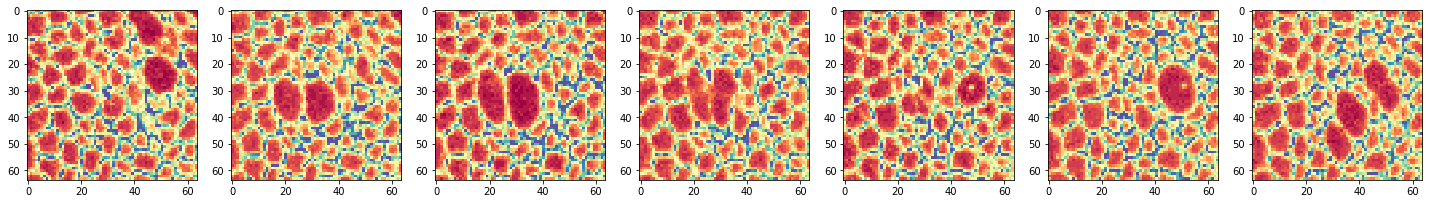

Epoch 7/250
 1052/14184 [=>............................] - ETA: 14:45 - loss: 3.8134 - accuracy: 0.0000e+00

In [ ]:
Train = NEATDynamic(config, model_dir, model_name)

Train.loadData()

Train.TrainModel()